# Week9 Unsupervised Learning

In week 9, we've covered:

* **Clustering**

In this notebook, we will work on an Online Retail dataset to explore customer segmentation through the unsupervised learning method, and apply association rule mining approach to find interesting rules and patterns in this transaction database. 

The dataset for this project contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. This dataset contains following information:

* InvoiceNo: A unique identifier for the invoice. An invoice number shared across rows means that those transactions * were performed in a single invoice (multiple purchases).
* StockCode: Identifier for items contained in an invoice.
* Description: Textual description of each of the stock item.
* Quantity: The quantity of the item purchased.
* InvoiceDate: Date of purchase.
* UnitPrice: Value of each item.
* CustomerID: Identifier for customer making the purchase.
* Country: Country of customer.

Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a TODO statement.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week9_Unsupervised_Learning_Homework.ipynb** notebook to your local folder and open it with Jupyter Notebook.


### Data Loading and EDA

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

In [1]:
# TODO
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
# TODO
retail = pd.read_excel("Online_Retail.xlsx")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


EDA

In [3]:
# TODO: Print dimensions of the dataset
print(retail.shape)


(541909, 8)


In [4]:
# TODO: Print statistical summary of all numerical attributes
retail.describe


<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [5]:
# TODO: Check for missing values
retail.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [6]:
# TODO: Disregard any records without customer id
retail_clean = retail.dropna(subset=['CustomerID'])
retail_clean.shape

(406829, 8)

In [7]:
retail_clean.isnull().mean()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [8]:
# TODO: Remove all records in that quantity or unit price is negative
retail_clean = retail_clean.loc[retail_clean["Quantity"]>0]
retail_clean = retail_clean.loc[retail_clean["UnitPrice"]>0]

retail_clean.shape

(397884, 8)

In [9]:
# TODO: Add a column to show the total sales amount for each line of transaction record
retail_clean["Sales_Amount"] = retail_clean["Quantity"] * retail_clean["UnitPrice"]
retail_clean.shape


(397884, 9)

Show top 10 customers based on the total sales amount

In [10]:
# TODO

retail_clean[['CustomerID',"Sales_Amount"]].groupby(['CustomerID']).sum().sort_values(by = 'Sales_Amount', ascending=False).head(10)




,Sales_Amount
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06
12415.0,124914.53
14156.0,117379.63
17511.0,91062.38
16029.0,81024.84


Use bar plot to show top 10 products based on the total sales amount

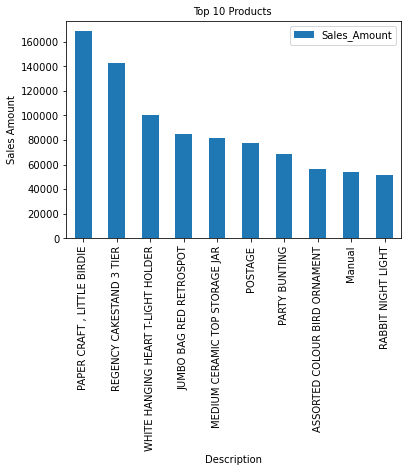

In [11]:
# TODO

retail_clean[['Description',"Sales_Amount"]].groupby(['Description']).sum().sort_values(by = 'Sales_Amount', ascending=False).head(10).plot(kind = 'bar')

plt.title('Top 10 Products ', fontsize=10)
plt.xlabel('Description', fontsize=10)
plt.ylabel('Sales Amount', fontsize=10)
plt.show()


Use bar plot to show when (which month) we generate most revenue in a year

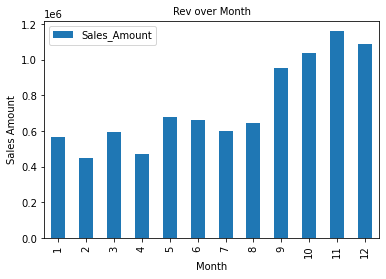

In [12]:
# TODO

retail_clean['month'] = retail_clean['InvoiceDate'].dt.month

retail_clean[['month',"Sales_Amount"]].groupby(['month']).sum().plot(kind = 'bar')

plt.title('Rev over Month', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Sales Amount', fontsize=10)
plt.show()

Towards the end of the year, sales make a huge jump to over a million.

### Data Preprocessing

Once we have created our customer transaction dataset, we will perform some preprocessing on the data. 

In this practice, we would like to leverage RFM analysis to explore customer segmentation. RFM analysis depends
on Recency (R), Frequency (F), and Monetary (M) measures which are three important
purchase-related variables that influence the future purchase possibilities of the customers. 

* R -- How long has it been since the customer’s last purchase?
* F -- How often has the customer made a purchase over a defined period of time?
* M -- How much money has the customer spend with us over a defined period of time?

In [13]:
from datetime import timedelta

In [14]:
df = retail_clean

In [15]:
# Assuming your dataset is named as df
# --Group data by customerID--
# Create snapshot date
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)
# Grouping by CustomerID
df_process = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Sales_Amount': 'sum'})
# Rename the columns 
df_process.rename(columns={'InvoiceDate': 'Recency',
                           'InvoiceNo': 'Frequency',
                           'Sales_Amount': 'Monetary'}, inplace=True)

2011-12-10 12:50:00


In [16]:
df_process.head()
df_process.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


For our clustering, we will be using the K-means clustering algorithm. One of the requirements for proper functioning of the algorithm is the mean centering of the variable values. Mean centering of a variable value means that we will replace the actual value of the variable with a standardized value, so that the variable has a mean of 0 and variance of 1. This ensures that all the variables are in the same range and the difference in ranges of values doesn't cause the algorithm to not perform well. This is akin to feature scaling.

Another problem that you can investigate about is the huge range of values each variable can take. This problem is particularly noticeable for the monetary amount variable. To take care of this problem, we will transform all the variables on the log scale. This transformation, along with the standardization, will ensure that the input to our algorithm is a homogenous set of scaled and transformed values.

Apply log transformation and StandardScaler

In [17]:
# Todo
import math
from sklearn.preprocessing import StandardScaler
df_log = df_process[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

df_log.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,3.767507,3.679738,6.590789
std,1.432448,1.326110,1.260894
min,0.000000,0.000000,1.322000
25%,2.890000,2.833000,5.728000
50%,3.932000,3.714000,6.514000
75%,4.956000,4.605000,7.415750
max,5.924000,8.968000,12.543000


In [18]:
sc = StandardScaler()
X = sc.fit_transform(df_log)

### K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method and the Silhouette method.

#### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

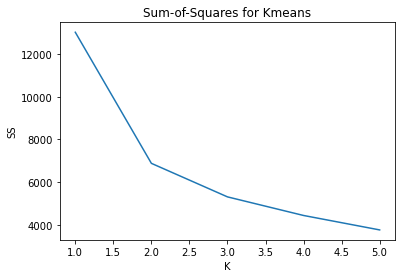

In [19]:
# TODO
from sklearn.cluster import KMeans

SSKMeans = []
for k in range(1,6):
    kmeans = KMeans(n_clusters=k).fit(X)
    SSKMeans.append([k, kmeans.inertia_])
    

# plot cluster number vs inertia
plt.plot(pd.DataFrame(SSKMeans)[0],pd.DataFrame(SSKMeans)[1])
plt.xlabel('K')
plt.ylabel('SS')
plt.title('Sum-of-Squares for Kmeans')
plt.show()


#### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap.

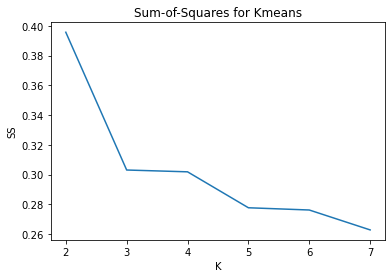

In [20]:
# TODO
from sklearn.metrics import silhouette_score

SSSil = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k).fit(X)
    SSSil.append([k, silhouette_score(X, kmeans.labels_)])
    

# plot cluster number vs inertia
plt.plot(pd.DataFrame(SSSil)[0],pd.DataFrame(SSSil)[1])
plt.xlabel('K')
plt.ylabel('SS')
plt.title('Sum-of-Squares for Kmeans')
plt.show()

### Optional
#### Visualization of Clusters using PCA

<div class="span12 alert alert-info">
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components (label them x and y)
<li> Choose a value of K from above and use KMeans to cluster using the two PCA components (x and y)
<li> Create a data frame with the following fields:
  <ul>
  <li> customer id
  <li> cluster id 
  <li> PCA component x
  <li> PCA component y    
  </ul>
<li> Plot a scatterplot of the x vs y columns and color-code points differently based on cluster ID
<li> How do the clusters look? 

</div>

In [21]:
# TODO
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape)
print(X_pca.shape)

(4338, 3)
(4338, 3)


In [28]:
print(pca.components_)

[[-0.50833938  0.60912937  0.60873022]
 [-0.86115352 -0.35760725 -0.36129168]
 [-0.00238703 -0.70786896  0.70633975]]


In [29]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.16196275 0.59542534 0.24330363]
[0.72048812 0.19842936 0.08108252]


In [36]:
kmeans = KMeans(n_clusters=2).fit_predict(X_pca)
summary = pd.DataFrame(columns=['CustomerID','cluster','X','Y'])
summary['CustomerID'] =  df_process.index
summary['cluster'] = kmeans
summary['X'] = X_pca[:,0]
summary['Y'] = X_pca[:,1]

summary

,CustomerID,cluster,X,Y
0,12346.0,1,-0.155629,-1.558127
1,12347.0,0,2.649996,0.927864
2,12348.0,1,0.128187,-0.522937
3,12349.0,0,0.998100,0.078016
4,12350.0,1,-1.464010,-0.732608
...,...,...,...,...
4333,18280.0,1,-1.966224,-0.347606
4334,18281.0,1,-2.365810,0.237613
4335,18282.0,1,-0.629780,1.741141
4336,18283.0,0,2.709603,0.334055


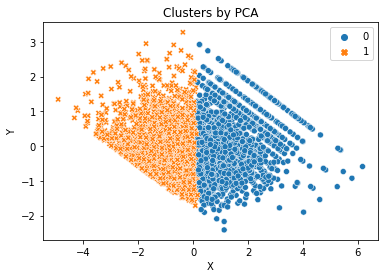

In [37]:
sns.scatterplot(x='X', y='Y', hue='cluster', style='cluster', data=summary)
plt.title('Clusters by PCA')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Submission

Commit your completed **Week9_Unsupervised_Learning_Homework.ipynb** notebook to your personal Github repo you shared with the faculty.